In [6]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
mean_list=[]
var_list=[]
for filename in os.listdir('data'):
	if filename!='.DS_Store':
		purename=re.split('\.',filename)[0]
		f = os.path.join('data', filename)
		# print(filename)
		with open(f,'rb') as fo:
			data0=pd.read_parquet(fo,engine="fastparquet")
		data0.dropna(inplace=True)
		delay_mean=data0.groupby('cdn')['ttfb_ms'].mean()
		delay_var=data0.groupby('cdn')['ttfb_ms'].std()
		mean_list+=delay_mean.tolist()
		var_list+=delay_var.tolist()
		# timestamp=data0.groupby('cdn')['start_time_ms'].apply(list).to_dict()

<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
/var/folders/6k/pb317l7j3cvbw86w9005j5340000gp/T/ipykernel_84316/1918856986.py:5: SyntaxWarning: invalid escape sequence '\.'
  purename=re.split('\.',filename)[0]


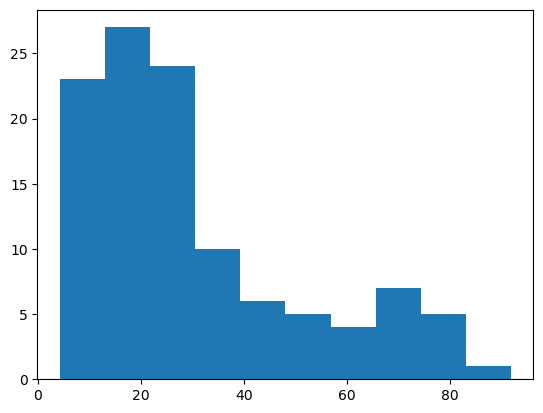

In [12]:
plt.hist(var_list)
plt.show()

In [9]:
import pickle
with open('mean.pkl','wb') as f:
	pickle.dump(mean_list,f)
with open('var.pkl','wb') as f:
	pickle.dump(var_list,f)
